# Reproducing Balaban Exp2 CDA Study (2019) - G vs B

In [1]:
import numpy as np
import pandas as pd
import glob
import pickle

import mne
from mne import Epochs, pick_channels, find_events
from mne.io import read_raw_bdf

import sys
sys.path.append('/Users/nick/Documents/PhD/CLCT/reprod/studies/Balaban-2019/')
from events import get_specific_events, get_epochs, get_CDA, prep_report, fill_report, get_report, checksum


import matplotlib.pyplot as plt
%matplotlib inline

## 1. Prep Data

In [2]:
#==================================================================
# General Variables
#==================================================================
# Organize Triggers
triggers = dict();

triggers['2_Integrated'] = [21] 
triggers['4_Integrated'] = [22]
triggers['Separated'] = [23]

triggers['left'] = [32]  #[31]
triggers['right'] = [31] #[32]

triggers['good'] = [50,60]   # YR: Why 2 triggers for good and 2 triggers for bad?!
triggers['bad'] = [5,6]

# Labels
conds = ['2_Integrated', '4_Integrated', 'Separated']
sides = ['left', 'right']
perfs = ['good', 'bad']

# # CDA Channels
chan_right = ['P8', 'PO8', 'PO4']
chan_left = ['P7', 'PO7', 'PO3']

# Epoch Information
epoch_length = 3.7
epoch_tmin = -0.2
baseline_corr = (-0.2, 0)

# # CDA main variable!
cda_dict = dict()
report = prep_report(conds, sides, perfs)

#==================================================================
# Main Loop - Loading All Files & Extract CDAs.
#==================================================================
folderpath = '/Users/nick/Documents/PhD/CDA Datasets/Balaban 2019/Data/Exp2_EEG/'
#folderpath = 'D:\\CLNT\\Data\\Open Datasets\\Balaban 2019\\Data\\Exp2_EEG\\'
#filepath = folderpath + '536.bdf'
foldersep = '/'

for filepath in glob.iglob(folderpath + '*.bdf'):
    filename = filepath[filepath.rfind(foldersep)+1:]
    print('Processing: ' + filename + '...')

    # ------------------------
    # 1. -- Load File --
    # ------------------------
    raw = read_raw_bdf(filepath, preload=True)
    
    # ------------------------
    # 2. -- Preprocessing --
    # ------------------------
    # Keep only EEG channels and reference
    #raw = raw.rename_channels({'EXG7':'A1', 'EXG8': 'A2'})
    raw = raw.drop_channels(ch_names=['EXG3','EXG4','EXG5','EXG6', 'EXG7','EXG8',])
    raw = raw.set_eeg_reference(ref_channels=['EXG1', 'EXG2'])
    raw = raw.set_channel_types({'EXG1': 'misc', 'EXG2': 'misc'})

    # Set Electrodes Locations
    #montage = mne.channels.make_standard_montage('biosemi32')
    #raw.set_montage(montage)

    preproc = raw

    # Resample
    #preproc = preproc.resample(1024)

    # Filter
    preproc = preproc.filter(.1, 30., fir_design='firwin', skip_by_annotation='edge')

    events = find_events(preproc)
    #preproc.plot(events=events, block=True, lowpass=40)
    
    # ------------------------
    # 3. -- Epochs --
    # ------------------------
    # Get events based on conditions, sides (L/R) and performances
    # Code available in events.py
    specific_events = get_specific_events(events, conds, sides, perfs, triggers)


    epochs_dict = get_epochs(preproc, specific_events, epoch_length, epoch_tmin, baseline_corr)

    # ------------------------
    # 4. - Report & Checksum -
    # ------------------------
    report = fill_report(report, filename, specific_events)
    report.at[filename, 'checksum'] = checksum(specific_events, epochs_dict)
    
    # ------------------------
    # 5. -- CDA --
    # ------------------------
    cda_dict[filename] = get_CDA(epochs_dict, conds, sides, perfs, chan_right, chan_left)

# Add time points to CDA for later use.
times = epochs_dict['2_Integrated']['left']['good'].times

print('{} Subjects & {} Trials'.format(len(report), np.sum([report[cond].sum() for cond in conds])))
report

Processing: 514.bdf...
Extracting EDF parameters from /Users/nick/Documents/PhD/CDA Datasets/Balaban 2019/Data/Exp2_EEG/514.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 936703  =      0.000 ...  3658.996 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 8449 samples (33.004 sec)

Trigger channel has a non-zero initial value of 65536 (consider using initial_ev

0 projection items activated
Loading data for 26 events and 999 original time points ...
0 bad epochs dropped
---------- 4_Integrated-right-good -------------
Not setting metadata
Not setting metadata
90 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 90 events and 999 original time points ...
0 bad epochs dropped
---------- 4_Integrated-right-bad -------------
Not setting metadata
Not setting metadata
14 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 14 events and 999 original time points ...
0 bad epochs dropped
---------- Separated-left-good -------------
Not setting metadata
Not setting metadata
105 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 105 events and 999 original time points ...
0 bad epochs dropped
---------- Separated-left-bad -------------
Not setting metadata
Not setting metadata
12 

Overlapping Events with no Side! Skipping...
====================== EPOCHING ======================
tmin:-0.2, tmax:3.7, baseline=(-0.2, 0)
---------- 2_Integrated-left-good -------------
Not setting metadata
Not setting metadata
87 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 87 events and 999 original time points ...
0 bad epochs dropped
---------- 2_Integrated-left-bad -------------
Not setting metadata
Not setting metadata
13 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 13 events and 999 original time points ...
0 bad epochs dropped
---------- 2_Integrated-right-good -------------
Not setting metadata
Not setting metadata
103 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 103 events and 999 original time points ...
0 bad epochs dropped
---------- 2_Integrated-right-bad -------------
Not setti

0 projection items activated
Loading data for 22 events and 999 original time points ...
0 bad epochs dropped
====================== /EPOCHING ======================
Verifying Checksum (events vs epochs)...
Checksum all good!
Processing: 502.bdf...
Extracting EDF parameters from /Users/nick/Documents/PhD/CDA Datasets/Balaban 2019/Data/Exp2_EEG/502.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 995071  =      0.000 ...  3886.996 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- U

0 bad epochs dropped
---------- 4_Integrated-left-bad -------------
Not setting metadata
Not setting metadata
41 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 41 events and 999 original time points ...
0 bad epochs dropped
---------- 4_Integrated-right-good -------------
Not setting metadata
Not setting metadata
89 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 89 events and 999 original time points ...
0 bad epochs dropped
---------- 4_Integrated-right-bad -------------
Not setting metadata
Not setting metadata
29 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 29 events and 999 original time points ...
0 bad epochs dropped
---------- Separated-left-good -------------
Not setting metadata
Not setting metadata
75 matching events found
Applying baseline correction (mode: mean)
0 projection items activ

====================== EPOCHING ======================
tmin:-0.2, tmax:3.7, baseline=(-0.2, 0)
---------- 2_Integrated-left-good -------------
Not setting metadata
Not setting metadata
106 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 106 events and 999 original time points ...
0 bad epochs dropped
---------- 2_Integrated-left-bad -------------
Not setting metadata
Not setting metadata
10 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 10 events and 999 original time points ...
0 bad epochs dropped
---------- 2_Integrated-right-good -------------
Not setting metadata
Not setting metadata
90 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 90 events and 999 original time points ...
0 bad epochs dropped
---------- 2_Integrated-right-bad -------------
Not setting metadata
Not setting metadata
17 matching 

Loading data for 23 events and 999 original time points ...
0 bad epochs dropped
====================== /EPOCHING ======================
Verifying Checksum (events vs epochs)...
Checksum all good!
Processing: 505.bdf...
Extracting EDF parameters from /Users/nick/Documents/PhD/CDA Datasets/Balaban 2019/Data/Exp2_EEG/505.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 938495  =      0.000 ...  3665.996 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 30.00 Hz


0 bad epochs dropped
---------- 4_Integrated-left-bad -------------
Not setting metadata
Not setting metadata
42 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 42 events and 999 original time points ...
0 bad epochs dropped
---------- 4_Integrated-right-good -------------
Not setting metadata
Not setting metadata
81 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 81 events and 999 original time points ...
0 bad epochs dropped
---------- 4_Integrated-right-bad -------------
Not setting metadata
Not setting metadata
38 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 38 events and 999 original time points ...
0 bad epochs dropped
---------- Separated-left-good -------------
Not setting metadata
Not setting metadata
82 matching events found
Applying baseline correction (mode: mean)
0 projection items activ

====================== EPOCHING ======================
tmin:-0.2, tmax:3.7, baseline=(-0.2, 0)
---------- 2_Integrated-left-good -------------
Not setting metadata
Not setting metadata
86 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 86 events and 999 original time points ...
0 bad epochs dropped
---------- 2_Integrated-left-bad -------------
Not setting metadata
Not setting metadata
15 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 15 events and 999 original time points ...
0 bad epochs dropped
---------- 2_Integrated-right-good -------------
Not setting metadata
Not setting metadata
98 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 98 events and 999 original time points ...
0 bad epochs dropped
---------- 2_Integrated-right-bad -------------
Not setting metadata
Not setting metadata
13 matching ev

Loading data for 12 events and 999 original time points ...
0 bad epochs dropped
====================== /EPOCHING ======================
Verifying Checksum (events vs epochs)...
Checksum all good!
Processing: 508.bdf...
Extracting EDF parameters from /Users/nick/Documents/PhD/CDA Datasets/Balaban 2019/Data/Exp2_EEG/508.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 818431  =      0.000 ...  3196.996 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 30.00 Hz


,2_Integrated,4_Integrated,Separated,left,right,good,bad,2_Integrated-left,2_Integrated-left-good,2_Integrated-good,...,Separated-left,Separated-left-good,Separated-good,Separated-left-bad,Separated-bad,Separated-right,Separated-right-good,Separated-right-bad,checksum,notes
514.bdf,220,241,211,331,341,470,202,112,87,165,...,99,68,148,31,63,112,80,32,1,
515.bdf,224,210,238,328,344,578,94,105,91,195,...,117,105,213,12,25,121,108,13,1,
501.bdf,218,217,188,319,304,426,197,118,86,157,...,97,67,140,30,48,91,73,18,1,
517.bdf,214,236,222,315,357,571,101,100,87,190,...,119,106,199,13,23,103,93,10,1,
503.bdf,239,212,221,326,346,516,156,115,94,203,...,105,81,175,24,46,116,94,22,1,
502.bdf,220,223,229,341,331,476,196,114,87,166,...,112,77,173,35,56,117,96,21,1,
516.bdf,226,226,220,340,332,509,163,134,106,182,...,98,75,171,23,49,122,96,26,1,
512.bdf,237,233,202,328,344,512,160,114,92,190,...,99,78,165,21,37,103,87,16,1,
506.bdf,223,234,215,348,324,551,121,116,106,196,...,113,101,182,12,33,102,81,21,1,
507.bdf,224,220,228,348,324,492,180,110,82,164,...,122,98,181,24,47,106,83,23,1,


## 4. Plot CDA Data - Grand CDA Average

In [3]:
cda_all = dict()

for cond in cda_dict[list(cda_dict.keys())[0]].keys():
    cda_all[cond] = dict()

    for f in cda_dict.keys():
        if len(cda_dict[f][cond]['left']['good']) > 0:
            cda_dict_cur = (cda_dict[f][cond]['left']['good'] + cda_dict[f][cond]['right']['good'])/2
            cda_all[cond] = np.vstack([cda_all[cond], cda_dict_cur]) if len(cda_all[cond]) else cda_dict_cur
        else:
            print("==== SKIPPED: 0 points! (File: {} - Trigger: {})".format(str(f), str(t)))

cda_all

## ====== Manual Cleanup ========
# Anything specific required for Balaban 2019?

{'2_Integrated': array([[ 2.72036791e-07,  2.05917846e-07,  1.70304337e-07, ...,
         -3.42707734e-07, -4.68791995e-07, -5.61349687e-07],
        [-5.49808395e-08,  1.13804733e-08,  9.18422936e-08, ...,
         -9.24457521e-07, -8.67600026e-07, -8.00553384e-07],
        [-2.80073215e-07, -4.35525048e-07, -6.73557864e-07, ...,
          5.46381698e-07,  5.77476166e-07,  6.12849542e-07],
        ...,
        [-7.47324073e-07, -5.99545772e-07, -3.88097209e-07, ...,
         -9.50864315e-07, -1.01303562e-06, -1.05441694e-06],
        [-1.49426027e-07, -1.68016720e-07, -1.73381010e-07, ...,
          9.14732461e-07,  9.48303944e-07,  8.59500523e-07],
        [-4.80848682e-07, -4.58889668e-07, -4.33564275e-07, ...,
          2.95120473e-07,  1.21716257e-08, -2.33004073e-07]]),
 '4_Integrated': array([[ 4.54969557e-07,  4.42678875e-07,  3.83400989e-07, ...,
         -3.82357116e-07, -7.28382581e-07, -9.68349022e-07],
        [-3.62312403e-07, -2.87626741e-07, -2.36256058e-07, ...,
      

## Final CDA figure from Balaban 2019

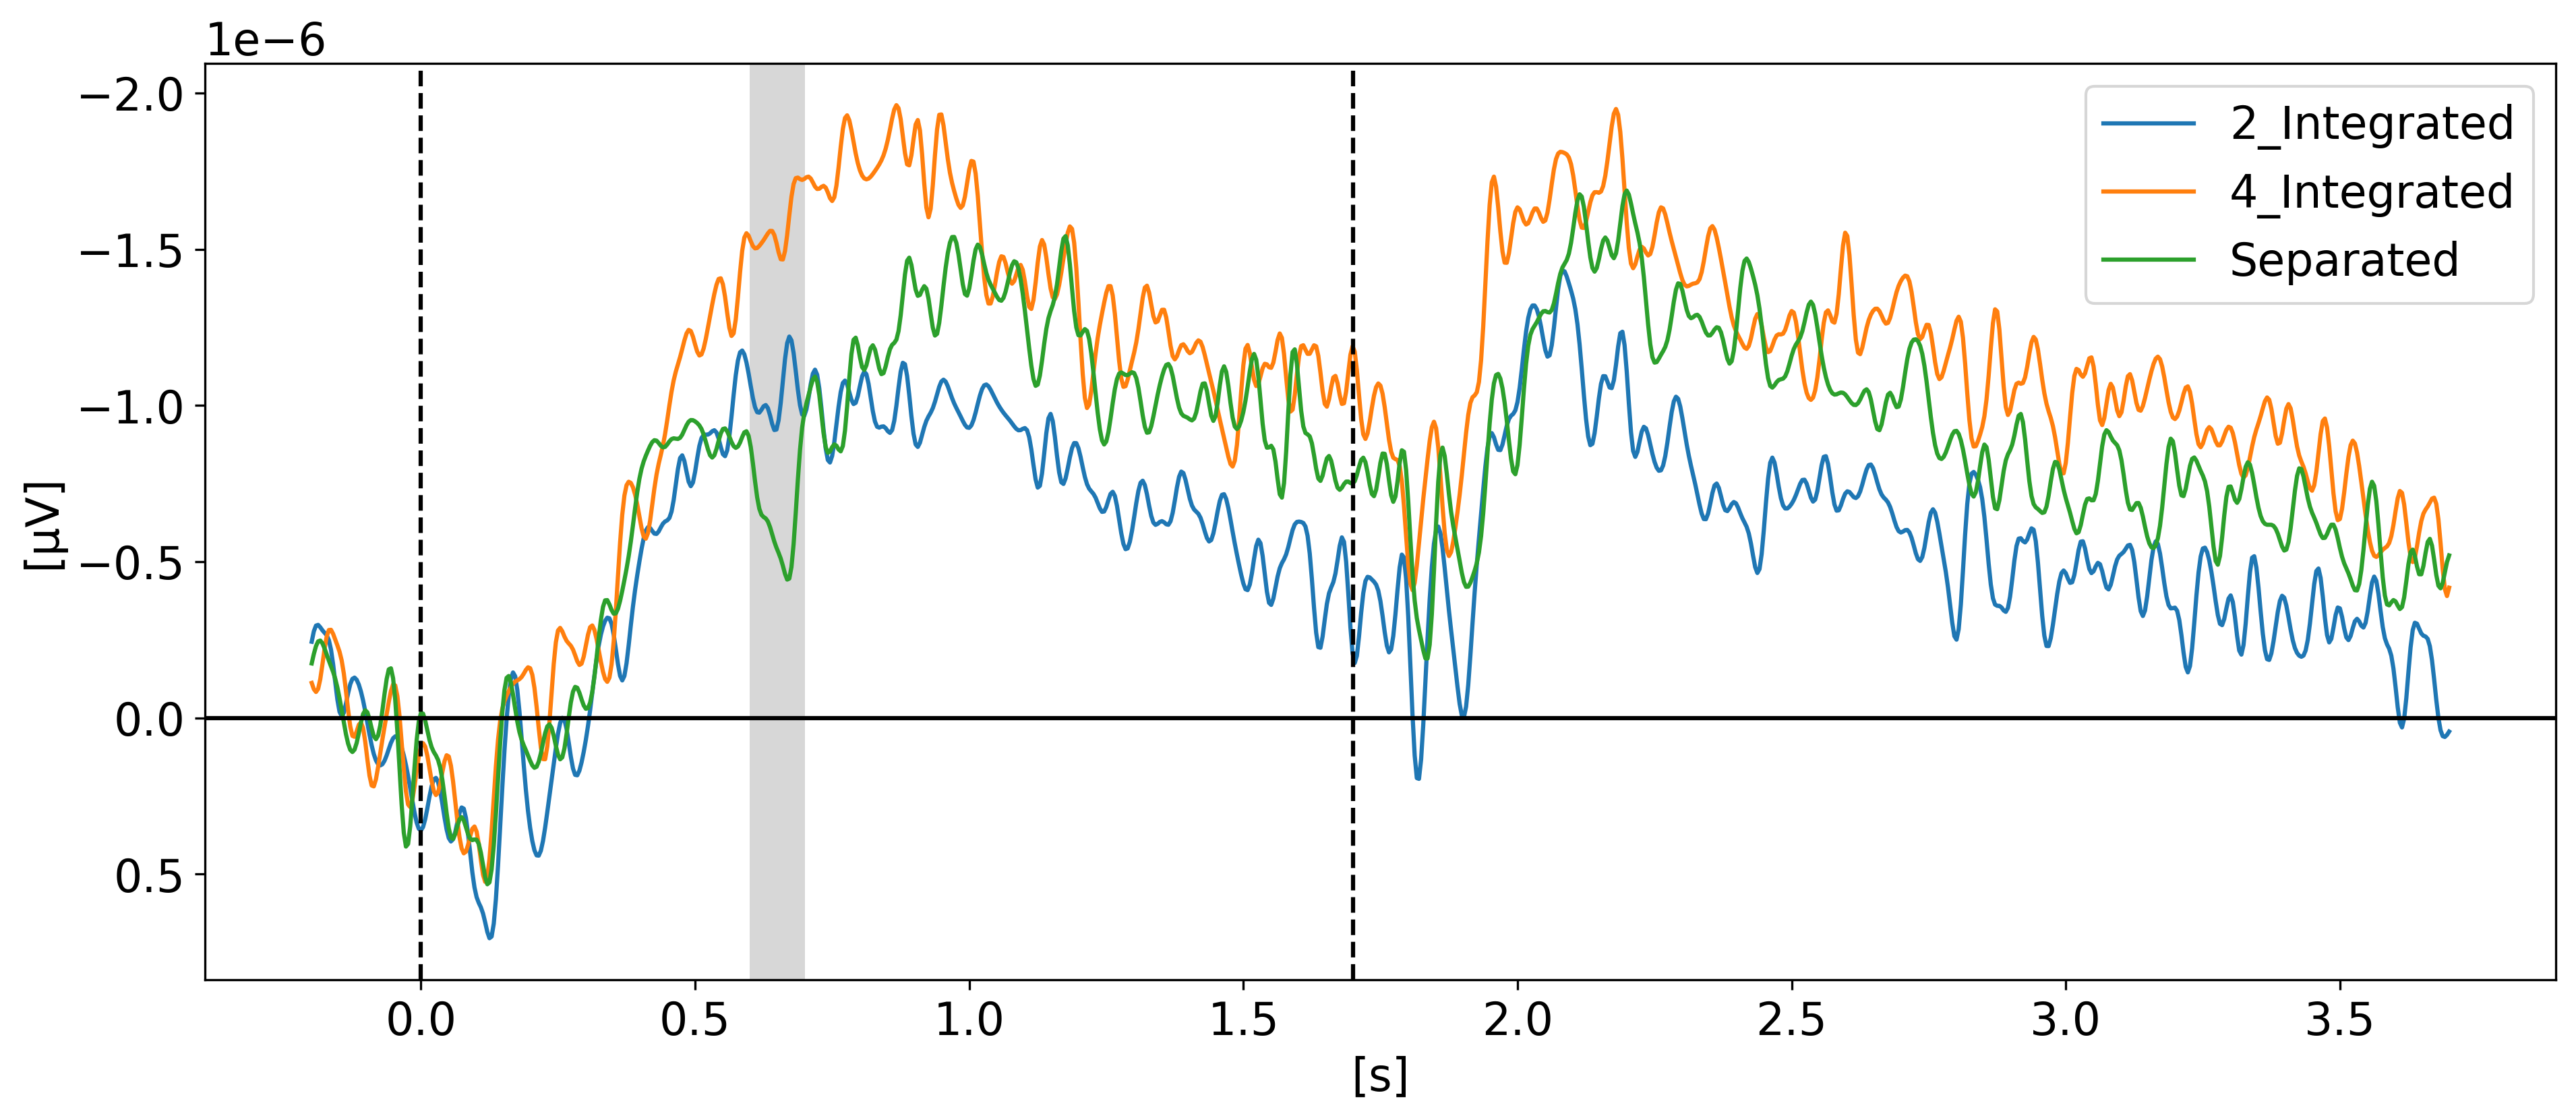

In [4]:
plt.rcParams.update({'font.size': 16})

plt.figure(figsize=(15, 6), dpi=300)
plt.plot((times), cda_all['2_Integrated'].mean(0), label='2_Integrated')
plt.plot((times), cda_all['4_Integrated'].mean(0), label='4_Integrated')
plt.plot((times), cda_all['Separated'].mean(0), label='Separated')

plt.axvline(x=0, color='k', linestyle='--')
plt.axvline(x=1.7, color='k', linestyle='--')
plt.axhline(y=0, color='k', linestyle='-')
plt.axvspan(0.6, 0.7, alpha=0.9, facecolor='lightgray')
plt.gca().invert_yaxis()
plt.legend()
plt.ylabel('[μV]')
plt.xlabel('[s]')
plt.savefig("Balaban-2019-Exp2_CDA-recall.png", dpi=300, format='png')